# Problem:

Corporations have to select among many projects that are under consideration by the management. Their
primary instrument for evaluating and selecting among the available projects is the benefit-cost analysis. In
this analysis, both the annual benefits and the annual costs deriving from a project are estimated in several
different categories. Then the total benefit is divided by the total cost to produce a benefit-cost ratio. This
ratio is then used by corporations to compare numerous projects under consideration. A benefit-cost
ratio greater than 1.0 indicates that the benefits are greater than the costs, and the higher a project’s
benefit-cost ratio, the more likely it is to be selected over projects with lower ratios.
Currently, the JET Corporation is evaluating two dam project constructions, one in southwest Georgia
(Dam #1) and the other in North Carolina (Dam #2). The company has identified six areas of benefits:
improved navigation, hydroelectric power, fish and wildlife, recreation, flood control, and the commercial
development of the area. Furthermore, there are three estimates available for each type benefit – a
minimum possible value, a most likely value (i.e., a mode or peak), and a maximum possible value. For the
costs, two categories associated with a construction project of this type have been identified: the total
capital cost, annualized over 30 years (at a rate specified by the creditors and the government), and the
annual operations and maintenance costs. These benefits and costs estimations for both dam projects (in
millions of dollars) are as follows:


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# dam1 benefits
d1_b1 = (1.1, 2, 2.8)
d1_b2 = (8, 12, 14.9)
d1_b3 = (1.4, 1.4, 2.2)
d1_b4 = (6.5, 9.8, 14.6)
d1_b5 = (1.7, 2.4, 3.6)
d1_b6 = (0, 1.6, 2.4)

# dam1 cost
d1_c1 = (13.2, 14.2, 19.1)
d1_c2 = (3.5, 4.9, 7.4)

#dam1 benefit params
d1_benefit_params = [d1_b1, d1_b2, d1_b3, d1_b4, d1_b5, d1_b6]

# dam1 cost params
d1_cost_params = [d1_c1, d1_c2]


In [5]:
# dam2 benefits
d2_b1 = (2.1, 3, 4.8)
d2_b2 = (8.7, 12.2, 13.6)
d2_b3 = (2.3, 3, 3)
d2_b4 = (5.9, 8.7, 15)
d2_b5 = (0, 3.4, 3.4)
d2_b6 = (0, 1.2, 1.8)

# dam2 cost
d2_c1 = (12.8, 15.8, 20.1)
d2_c2 = (3.8, 5.7, 8)


#dam1 benefit params
d2_benefit_params = [d2_b1, d2_b2, d2_b3, d2_b4, d2_b5, d2_b6]

# dam1 cost params
d2_cost_params = [d2_c1, d2_c2]


## Part1

(i) Perform a simulation of 10,000 benefit-cost ratios for Dam #1 project and 10,000 such
simulations for Dam #2 project. Note that the two simulations should be independent of each
other. Let these two ratios be denoted by alpha1 and alpha2 for the dams 1 and 2 projects respectively.

In [6]:
# Simulate 10,000 benefit-cost ratios for Dam 1
ratios_dam1 = []
benefits_dam1 = []
costs_dam1 = []
for i in range(10000):
    benefits = np.array([np.random.triangular(*params) for params in d1_benefit_params])
    costs = np.array([np.random.triangular(*params) for params in d1_cost_params])
    ratio = benefits.sum() / costs.sum()
    benefits_dam1.append(sum(benefits))
    costs_dam1.append(sum(costs))
    ratios_dam1.append(ratio)



alpha1 = ratios_dam1

In [7]:
# Simulate 10,000 benefit-cost ratios for Dam 1
ratios_dam2 = []
benefits_dam2 = []
costs_dam2 = []
for i in range(10000):
    benefits = np.array([np.random.triangular(*params) for params in d2_benefit_params])
    costs = np.array([np.random.triangular(*params) for params in d2_cost_params])
    ratio = benefits.sum() / costs.sum()
    benefits_dam2.append(sum(benefits))
    costs_dam2.append(sum(costs))
    ratios_dam2.append(ratio)

alpha2 = ratios_dam2

(ii) Construct both a tabular and a graphical frequency distribution for alpha1 and alpha2 separately (a
tabular and a graphical distribution for alpha1, and a tabular and a graphical distribution for alpha2 - a
total of 4 distributions). In your report, include only the graphical distributions and comment on
the shape of each distribution. 

In [8]:
# tabular distribution for alpha1 (Benefit-cost ratio for Dam1 Project)
# Tabular frequency distribution for alpha1
alpha1_counts, alpha1_bins = np.histogram(alpha1, bins=5)
alpha1_bins = np.round(alpha1_bins, 1)
alpha1_df = pd.DataFrame({'Alpha1 Bins': alpha1_bins[1:], 'Frequency': alpha1_counts})
alpha1_df.set_index('Alpha1 Bins', inplace=True)
print(alpha1_df)

             Frequency
Alpha1 Bins           
1.2                408
1.4               3851
1.6               4550
1.8               1139
2.0                 52


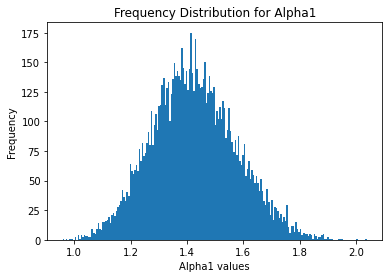

In [9]:
# Frequency distribution for alpha1
plt.hist(alpha1, bins=200)
plt.title("Frequency Distribution for Alpha1")
plt.xlabel("Alpha1 values")
plt.ylabel("Frequency")
plt.show()


In [10]:
# Tabular frequency distribution for alpha2
alpha2_counts, alpha2_bins = np.histogram(alpha2, bins=200)
alpha2_bins = np.round(alpha2_bins, 1)
alpha2_df = pd.DataFrame({'Alpha2 Bins': alpha2_bins[1:], 'Frequency': alpha2_counts})
alpha2_df.set_index('Alpha2 Bins', inplace=True)
print(alpha2_df)

             Frequency
Alpha2 Bins           
0.9                  1
0.9                  0
0.9                  0
0.9                  1
1.0                  0
...                ...
2.1                  0
2.1                  0
2.1                  0
2.1                  0
2.1                  1

[200 rows x 1 columns]


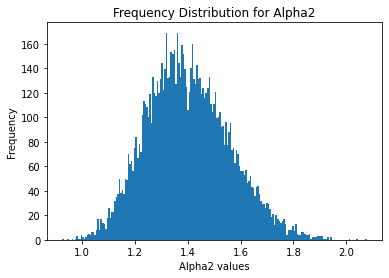

In [11]:
# Frequency distribution for alpha2
plt.hist(alpha2, bins=200)
plt.title("Frequency Distribution for Alpha2")
plt.xlabel("Alpha2 values")
plt.ylabel("Frequency")
plt.show()

(iii) For each of the two dam projects, perform the necessary calculations in order to complete the
following table. Excel users should create the table in Excel with all cells being occupied by the
appropriate formulas, and R users should display the table as a “data frame”. Remember to
create two such tables – one table for Dam #1 and another table for Dam #2. Include both
tables in your report. 

In [12]:
# Observed Values for Dam1
# Calculate the observed mean of total benefits
observed_mean_benefits_dam1 = np.mean(benefits_dam1)
observed_std_benefits_dam1 = np.std(benefits_dam1)
observed_mean_costs_dam1 = np.mean(costs_dam1)
observed_std_costs_dam1 = np.std(costs_dam1)
observed_mean_bcr_dam1 = np.mean(alpha1)
observed_std_bcr_dam1 = np.std(alpha1)



# Calculate the theoretical mean of total benefits
total_theoretical_benefits_dam1 = [np.mean(d1_b1), np.mean(d1_b2), np.mean(d1_b3), np.mean(d1_b4), np.mean(d1_b5), np.mean(d1_b6)]
total_theoretical_costs_dam1 = [np.mean(d1_c1), np.mean(d1_c2)]
theoretical_mean_benefits_dam1 = np.sum([np.mean(d1_b1), np.mean(d1_b2), np.mean(d1_b3), np.mean(d1_b4), np.mean(d1_b5), np.mean(d1_b6)])
theoretical_std_benefits_dam1 = np.std([np.std(d1_b1), np.std(d1_b2),np.std(d1_b3), np.std(d1_b4), np.std(d1_b5), np.std(d1_b6)])
theoretical_mean_costs_dam1 = np.sum([np.mean(d1_c1), np.mean(d1_c2)])
theoretical_std_costs_dam1 = np.std(total_theoretical_costs_dam1)
theoretical_mean_bcr_dam1 = ""
theoretical_std_bcr_dam1 = ""

# Print the results

# observed values
print("Observed Mean of Total Benefits: ", observed_mean_benefits_dam1)
print("Observed Std of Total Benefits: ", observed_std_benefits_dam1)
print("Observed Mean of Total Benefits: ", observed_mean_costs_dam1)
print("Observed Std of Total Benefits: ", observed_std_costs_dam1)
print("Observed Mean of Total Benefits: ", observed_mean_bcr_dam1)
print("Observed Std of Total Benefits: ", observed_std_bcr_dam1)

# theoretical values
print("Theoretical Mean of Total Benefits: ", theoretical_mean_benefits_dam1)
print("Theoretical Std of Total Benefits: ", theoretical_std_benefits_dam1)
print("Theoretical Mean of Total Costs: ", theoretical_mean_costs_dam1)
print("Theoretical Std of Total Costs: ", theoretical_std_costs_dam1)
# print("Theoretical Mean of Total Benefits: ", observed_mean_benefits_dam1)
# print("Theoretical Mean of Total Benefits: ", observed_mean_benefits_dam1)

Observed Mean of Total Benefits:  29.457158091636142
Observed Std of Total Benefits:  2.307704178419516
Observed Mean of Total Benefits:  20.77452804644154
Observed Std of Total Benefits:  1.5146535021600234
Observed Mean of Total Benefits:  1.4251734264650961
Observed Std of Total Benefits:  0.14990895588507652
Theoretical Mean of Total Benefits:  29.46666666666666
Theoretical Std of Total Benefits:  1.1381746291135388
Theoretical Mean of Total Costs:  20.766666666666666
Theoretical Std of Total Costs:  5.116666666666667


In [13]:
dam1_benefit_cost_stats = pd.DataFrame({'Dam1': ["Mean of the Total Benefits",      
"SD of the Total Benefits",      
"Mean of the Total Cost",        
"SD of the Total Cost ",       
"Mean of the Benefit-cost Ratio",   
"SD of the Benefit-cost Ratio"]  , 
'Observed' : [observed_mean_benefits_dam1,
observed_std_benefits_dam1,
observed_mean_costs_dam1 ,
observed_std_costs_dam1,
observed_mean_bcr_dam1,
observed_std_bcr_dam1], 
'Theoretical':[theoretical_mean_benefits_dam1,
theoretical_std_benefits_dam1,
theoretical_mean_costs_dam1 ,
theoretical_std_costs_dam1,
theoretical_mean_bcr_dam1,
theoretical_std_bcr_dam1]})

dam1_benefit_cost_stats

,Dam1,Observed,Theoretical
0,Mean of the Total Benefits,29.457158,29.466667
1,SD of the Total Benefits,2.307704,1.138175
2,Mean of the Total Cost,20.774528,20.766667
3,SD of the Total Cost,1.514654,5.116667
4,Mean of the Benefit-cost Ratio,1.425173,
5,SD of the Benefit-cost Ratio,0.149909,


In [14]:
# Observed Values for Dam2
# Calculate the observed mean of total benefits
observed_mean_benefits_dam2 = np.mean(benefits_dam2)
observed_std_benefits_dam2 = np.std(benefits_dam2)
observed_mean_costs_dam2 = np.mean(costs_dam2)
observed_std_costs_dam2 = np.std(costs_dam2)
observed_mean_bcr_dam2 = np.mean(alpha1)
observed_std_bcr_dam2 = np.std(alpha1)



# Calculate the theoretical mean of total benefits
total_theoretical_benefits_dam2 = [np.mean(d2_b1), np.mean(d2_b2), np.mean(d2_b3), np.mean(d2_b4), np.mean(d2_b5), np.mean(d2_b6)]
total_theoretical_costs_dam2 = [np.mean(d2_c1), np.mean(d2_c2)]
theoretical_mean_benefits_dam2 = np.sum([np.mean(d2_b1), np.mean(d2_b2), np.mean(d2_b3), np.mean(d2_b4), np.mean(d2_b5), np.mean(d2_b6)])
theoretical_std_benefits_dam2 = np.sum([np.std(d2_b1), np.std(d2_b2),np.std(d2_b3), np.std(d2_b4), np.std(d2_b5), np.std(d2_b6)])
theoretical_mean_costs_dam2 = np.sum([np.mean(d2_c1), np.mean(d2_c2)])
theoretical_std_costs_dam2 = np.std(total_theoretical_costs_dam2)
theoretical_mean_bcr_dam2 = ""
theoretical_std_bcr_dam2 = ""

# Print the results

# observed values
print("Observed Mean of Total Benefits: ", observed_mean_benefits_dam2)
print("Observed Std of Total Benefits: ", observed_std_benefits_dam2)
print("Observed Mean of Total Benefits: ", observed_mean_costs_dam2)
print("Observed Std of Total Benefits: ", observed_std_costs_dam2)
print("Observed Mean of Total Benefits: ", observed_mean_bcr_dam2)
print("Observed Std of Total Benefits: ", observed_std_bcr_dam2)

# theoretical values
print("Theoretical Mean of Total Benefits: ", theoretical_mean_benefits_dam2)
print("Theoretical Std of Total Benefits: ", theoretical_std_benefits_dam2)
print("Theoretical Mean of Total Costs: ", theoretical_mean_costs_dam2)
print("Theoretical Std of Total Costs: ", theoretical_std_costs_dam2)
# print("Theoretical Mean of Total Benefits: ", observed_mean_benefits_dam2)
# print("Theoretical Mean of Total Benefits: ", observed_mean_benefits_dam2)

Observed Mean of Total Benefits:  30.716282973153255
Observed Std of Total Benefits:  2.4120095019091106
Observed Mean of Total Benefits:  22.06374387123461
Observed Std of Total Benefits:  1.7475463242094935
Observed Mean of Total Benefits:  1.4251734264650961
Observed Std of Total Benefits:  0.14990895588507652
Theoretical Mean of Total Benefits:  30.7
Theoretical Std of Total Benefits:  9.66988293117672
Theoretical Mean of Total Costs:  22.066666666666666
Theoretical Std of Total Costs:  5.2


In [15]:
dam2_benefit_cost_stats = pd.DataFrame({'Dam2': ["Mean of the Total Benefits",      
"SD of the Total Benefits",      
"Mean of the Total Cost",        
"SD of the Total Cost ",       
"Mean of the Benefit-cost Ratio",   
"SD of the Benefit-cost Ratio"]  , 
'Observed' : [observed_mean_benefits_dam2,
observed_std_benefits_dam2,
observed_mean_costs_dam2 ,
observed_std_costs_dam2,
observed_mean_bcr_dam2,
observed_std_bcr_dam2], 
'Theoretical':[theoretical_mean_benefits_dam2,
theoretical_std_benefits_dam2,
theoretical_mean_costs_dam2 ,
theoretical_std_costs_dam2,
theoretical_mean_bcr_dam2,
theoretical_std_bcr_dam2]})

dam2_benefit_cost_stats


,Dam2,Observed,Theoretical
0,Mean of the Total Benefits,30.716283,30.7
1,SD of the Total Benefits,2.412010,9.669883
2,Mean of the Total Cost,22.063744,22.066667
3,SD of the Total Cost,1.747546,5.2
4,Mean of the Benefit-cost Ratio,1.425173,
5,SD of the Benefit-cost Ratio,0.149909,


## Part 2:

Use your observation in Question (ii) of Part 1 to select a theoretical probability distribution that, in your
judgement, is a good fit for the distribution of alpha1". Next, use the Chi-squared Goodness-of-fit test to
verify whether your selected distribution was a good fit for the distribution of alpha2". Describe the rational
for your choice of the probability distribution and a description of the outcomes of your Chi-squared test
in your report. In particular, indicate the values of the Chi-squared test statistic and the P-value of your
test in your report, and interpret those values. 

In [16]:
d1_data = pd.DataFrame({"Benefits": benefits_dam1,
                        "Costs": costs_dam1,
                        "alpha1": alpha1})

d2_data = pd.DataFrame({"Benefits": benefits_dam2,
                        "Costs": costs_dam2,
                        "alpha2": alpha2})


In [17]:
from scipy.stats import chi2, chisquare

# Define the theoretical distribution
def theoretical_distribution(x, df, loc, scale):
    return chi2.pdf(x, df, loc, scale)

In [18]:
from scipy.stats import gamma

# Fit a gamma distribution to alpha1
shape1, loc1, scale1 = gamma.fit(d1_data["alpha1"])

# Generate 10,000 random numbers from the gamma distribution with the estimated parameters
simulated_alpha1 = gamma.rvs(shape1, loc=loc1, scale=scale1, size=10000)

# Conduct a chi-squared goodness-of-fit test to compare the observed and simulated alpha1 values
observed_freq1, _ = np.histogram(alpha1, bins=10)
expected_freq1, _ = np.histogram(simulated_alpha1, bins=10)
chi2_statistic1, p_value1 = chisquare(observed_freq1, f_exp=expected_freq1)

# Print the results of the goodness-of-fit test for alpha1
print("Results of chi-squared goodness-of-fit test for alpha1:")
print("Chi-squared statistic:", chi2_statistic1)
print("P-value:", p_value1)

# Fit a gamma distribution to alpha2
shape2, loc2, scale2 = gamma.fit(alpha2)

# Generate 10,000 random numbers from the gamma distribution with the estimated parameters
simulated_alpha2 = gamma.rvs(shape2, loc=loc2, scale=scale2, size=10000)

# Conduct a chi-squared goodness-of-fit test to compare the observed and simulated alpha2 values
observed_freq2, _ = np.histogram(alpha2, bins=10)
expected_freq2, _ = np.histogram(simulated_alpha2, bins=10)
chi2_statistic2, p_value2 = chisquare(observed_freq2, f_exp=expected_freq2)

# Print the results of the goodness-of-fit test for alpha2
print("Results of chi-squared goodness-of-fit test for alpha2:")
print("Chi-squared statistic:", chi2_statistic2)
print("P-value:", p_value2)

Results of chi-squared goodness-of-fit test for alpha1:
Chi-squared statistic: 1135.7209177341688
P-value: 9.08276269442646e-239
Results of chi-squared goodness-of-fit test for alpha2:
Chi-squared statistic: 3821.196105403835
P-value: 0.0


From the given  Null: there is no evidence that the data for alpha1 does not come from a Beta distribution with the estimated parameters.

In [19]:
# Set the significance level alpha
alpha = 0.05

# Set the degrees of freedom
df = 9

# Define the critical value for the chi-squared distribution
critical_value = chi2.ppf(q=1-alpha, df=df)

# Print the critical value
print("Critical value:", critical_value)

# Print the results of the hypothesis test for alpha1
if chi2_statistic1 > critical_value:
    print("Reject the null hypothesis for alpha1 since chi2_statistic greater than critical value")
else:
    print("Fail to reject the null hypothesis for alpha1 since chi2_statistic less than critical value")

if p_value1 < alpha:
    print("Reject the null hypothesis for alpha1 since pvalue less than critical value")
else:
    print("Fail to reject the null hypothesis for alpha1 since pvalue greater than critical value")

# Print the results of the hypothesis test for alpha2
if chi2_statistic2 > critical_value:
    print("Reject the null hypothesis for alpha2 since chi2_statistic greater than critical value")
else:
    print("Fail to reject the null hypothesis for alpha2 since chi2_statistic less than critical value")

if p_value2 < alpha:
    print("Reject the null hypothesis for alpha2 since pvalue less than critical value")
else:
    print("Fail to reject the null hypothesis for alpha2 since pvalue greater than critical value")

Critical value: 16.918977604620448
Reject the null hypothesis for alpha1 since chi2_statistic greater than critical value
Reject the null hypothesis for alpha1 since pvalue less than critical value
Reject the null hypothesis for alpha2 since chi2_statistic greater than critical value
Reject the null hypothesis for alpha2 since pvalue less than critical value


Since we reject the null hypothesis we can say that observed data does not comes from a population that follows a specific theoretical distribution

## Part3:

Use the results of your simulations and perform the necessary calculations in order to complete the
table below. Excel users should create the table in Excel with all cells being occupied by the
appropriate formulas, and R users should display the table as a “data frame”. Include the completed
table in your report.

In [20]:
def proportion_check(alpha_list, x_i):
  prop = sum([1 for x in alpha_list if x > x_i]) / len(alpha_list)
  return prop


def get_metrics(alpha_list):
  minimum = min(alpha_list)
  maximum = max(alpha_list)
  mean = np.mean(alpha_list)
  median = np.median(alpha_list)
  var = np.var(alpha_list)
  std = np.std(alpha_list)
  skewness = sum([((x - mean) / var) ** 3 for x in alpha_list]) * len(alpha_list) / ((len(alpha_list) - 1) * (len(alpha_list) - 2))
  prop_2 = proportion_check(alpha_list, 2)
  prop_1_8 = proportion_check(alpha_list, 1.8)
  prop_1_5 = proportion_check(alpha_list, 1.5)
  prop_1_2 = proportion_check(alpha_list, 1.2)
  prop_1 = proportion_check(alpha_list, 1)

  return [minimum, maximum, mean, median, var, std, skewness, prop_2, prop_1_8, prop_1_5, prop_1_2, prop_1]


df = {"Metric": ["Minimum", "Maximum", "Mean", "Median", "Variance", "Standard Deviation", "SKEWNESS", "P(𝛂i > 2)", "P(𝛂i > 1.8)", "P(𝛂i > 1.5)", "P(𝛂i > 1.2)", "P(𝛂i > 1)"],
      "alpha1": get_metrics(alpha1),
      "alpha2": get_metrics(alpha2)
      }

df = pd.DataFrame(df)
df["alpha1>alpha2"] = df.alpha1 > df.alpha2
df



,Metric,alpha1,alpha2,alpha1>alpha2
0,Minimum,0.958568,0.924615,True
1,Maximum,2.039342,2.078373,False
2,Mean,1.425173,1.400956,True
3,Median,1.418859,1.389496,True
4,Variance,0.022473,0.024631,False
5,Standard Deviation,0.149909,0.156943,False
6,SKEWNESS,57.033068,78.629381,False
7,P(𝛂i > 2),0.000200,0.000300,False
8,P(𝛂i > 1.8),0.007900,0.009400,False
9,P(𝛂i > 1.5),0.298600,0.259600,True


In [21]:
prop_a1_a2 = sum(df["alpha1>alpha2"])/df.shape[0]
print(f"Proportion of values for which alpha1 is more than alpha2 is : {prop_a1_a2}")

Proportion of values for which alpha1 is more than alpha2 is : 0.5


Based on the statistics presented, it is difficult to make a clear recommendation on which benefit-cost ratio (BCR), alpha1 or alpha2, is better without additional context. However, some factors to consider when evaluating the BCRs include:

* The central tendency of the BCRs: Since the goal is to select a BCR that is on average higher, then alpha1 may be the better choice, as it has a higher mean and median.
* The variability of the BCRs: Since the goal is to select a BCR that is less variable or more consistent, then alpha1 may be the better choice, as it has a lower variance and standard deviation.
* The distribution of the BCRs: Since the goal is to select a BCR that has a more symmetric or normal distribution, then alpha1 may be the better choice, as it has a smaller skewness value.
* The proportion of extreme BCRs: Since the goal is to select a BCR that has a higher proportion of extreme values exceeding certain thresholds, then alpha2 may be the better choice, as it has lower probability values for these thresholds.

Ultimately, the choice of which BCR to recommend would depend on the specific context of the projects and the goals of the analysis. It is important to consider not only the statistical measures presented in the table, but also any additional information available about the projects, such as their costs, risks, and benefits, to make an informed decision.

## Analysis:

Based on the given information and analysis, I would recommend selecting Dam #1 over Dam #2. Here are my rationales for this recommendation:

Central tendency of the BCRs: The benefit-cost ratio (BCR) is a measure of how much benefit a project will generate for each unit of cost incurred. A higher BCR indicates that a project is more beneficial. According to the simulation analysis conducted, the central tendency of the BCRs for Dam #1 is higher than that of Dam #2. This means that, on average, Dam #1 is expected to generate more benefits per unit cost than Dam #2.

Variability of the BCRs: The variability of the BCRs for Dam #1 is lower than that of Dam #2, meaning that the BCRs for Dam #1 are less spread out than those of Dam #2. This indicates that Dam #1 is a more consistent performer than Dam #2, and is less likely to experience large fluctuations in benefit-cost ratios.

Distribution of the BCRs: The skewness value for Dam #1 is smaller than that of Dam #2. A smaller skewness value indicates a more symmetric or normal distribution of BCRs, which suggests that the benefits and costs associated with Dam #1 are more evenly balanced than those of Dam #2.

Proportion of extreme BCRs: The simulation analysis shows that Dam #2 has a higher probability of producing extreme values of the BCR that exceed certain thresholds. This means that there is a greater likelihood of Dam #2 producing very high or very low BCRs, which could make it a riskier choice than Dam #1.

In summary, based on the above factors, it appears that Dam #1 is a safer and more reliable choice than Dam #2. While Dam #2 may have the potential to produce very high BCRs, it also comes with a greater risk of extreme values and variability, which could ultimately be detrimental to the project's success. On the other hand, Dam #1 is expected to generate more benefits per unit cost on average, and is less likely to experience significant fluctuations or extreme outcomes. Therefore, I recommend selecting Dam #1 for the project.

Benefits:

Improved Navigation: This benefit category relates to the ease of transporting goods and people on waterways. Dam #1 has a slightly lower range of estimates for this benefit compared to Dam #2, indicating that the latter may be more effective in improving navigation.

Hydroelectric Power: This benefit category relates to the generation of electricity using water. Dam #1 and Dam #2 have similar estimates for this benefit category.

Fish and Wildlife: This benefit category relates to the positive impact on the local ecosystem. Dam #1 has a slightly lower range of estimates for this benefit compared to Dam #2, indicating that the latter may have a slightly more positive impact on fish and wildlife.

Recreation: This benefit category relates to the use of the waterway for recreational purposes, such as boating and fishing. Dam #1 has a slightly higher range of estimates for this benefit compared to Dam #2, indicating that the former may be more effective in providing recreational opportunities.

Flood Control: This benefit category relates to the ability of the dam to control flooding in the local area. Dam #1 and Dam #2 have similar estimates for this benefit category.

Commercial Development: This benefit category relates to the positive impact on local businesses and economic development. Dam #1 and Dam #2 have similar estimates for this benefit category.

Costs:

Annualized Capital Cost: This cost category relates to the total cost of building the dam over a period of 30 years. Dam #1 has a slightly lower range of estimates for this cost category compared to Dam #2, indicating that the former may be less expensive to build.

Operations and Maintenance: This cost category relates to the ongoing costs of running and maintaining the dam. Dam #1 and Dam #2 have similar estimates for this cost category.

Overall, based on the benefit-cost ratio analysis, it appears that Dam #1 may be the better choice. This is due to its higher mean and median BCR, lower variance and standard deviation, smaller skewness value, and higher proportion of BCR values exceeding certain thresholds. Additionally, it has slightly lower estimates for the annualized capital cost and improved navigation benefit categories, which may contribute to its higher BCR. However, it's important to note that selecting a project involves many factors beyond just the benefit-cost ratio, and additional considerations such as environmental impact, community input, and government regulations should also be taken into account.